<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install --quiet vietocr

     |████████████████████████████████| 280 kB 8.2 MB/s 
     |████████████████████████████████| 948 kB 35.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


# Inference

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [3]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [4]:
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [5]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp9wfc13x9/dl
100%|██████████| 152M/152M [00:00<00:00, 226MB/s]


In [6]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 92.2MB/s]


In [7]:
! ls sample | shuf |head -n 5

036301002139.jpeg
458_Unmodified_82895.jpg
466_MONIKER_49537.jpg
4448.jpg
036183007715.jpeg


'VŨ THUỲ NINH'

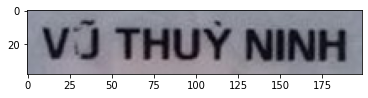

In [8]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [9]:
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
100% 61.2M/61.2M [00:00<00:00, 133MB/s]


In [10]:
! unzip -qq -o ./data_line.zip

In [19]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 4833, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 4833 (delta 8), reused 27 (delta 8), pack-reused 4806
Receiving objects: 100% (4833/4833), 462.26 MiB | 31.77 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (4792/4792), done.


In [24]:
import json
root = "/content/Vietnamese-HTR/data/Data 1: Handwriting OCR for Vietnamese Address/"

def create_vietocr_annote(root, img_dir_name, output_name):
    #read the file
    with open(root + img_dir_name + "/labels.json") as file:
        labels = json.load(file)
    data = []
    for img_name in labels:
        data.append(f"{img_dir_name}/{img_name}\t{labels[img_name]}\n")
    print(data)


    #write back the file
    with open(root + output_name,"w") as f:
        f.writelines(data)
create_vietocr_annote(root, "0916_Data Samples 2", "train_annotation.txt")
create_vietocr_annote(root, "1015_Private Test", "test_annotation.txt")

['0916_Data Samples 2/0000_samples.png\tSố 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương\n', '0916_Data Samples 2/0001_samples.png\tSố 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh\n', '0916_Data Samples 2/0002_samples.png\tSố 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương\n', '0916_Data Samples 2/0003_samples.png\t42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh\n', '0916_Data Samples 2/0004_samples.png\t200 Phan Bội Châu, Phường Trường An, Thành phố Huế, Thừa Thiên - Huế\n', '0916_Data Samples 2/0005_samples.png\t27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ Chí Minh\n', '0916_Data Samples 2/0006_samples.png\tSố 113 Đường Hưng Thái 2, Phường Tân Phong, Quận 7, TP Hồ Chí Minh\n', '0916_Data Samples 2/0007_samples.png\tThôn 4, xã Giới Phiên, Thành phố Yên Bái, Yên Bái\n', '0916_Data Samples 2/0008_samples.png\tDãy II, B1, Trần Phú, Phường Cái Khế, Quận Ninh Kiều, Cần Thơ\n', '0916_Data Samples 2/0009_samples.png\tấp Hòa Lon

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [11]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [12]:
config = Cfg.load_config_from_name('vgg_transformer')

In [28]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/Vietnamese-HTR/data/Data 1: Handwriting OCR for Vietnamese Address/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [29]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': '/content/Vietnamese-HTR/data/Data 1: Handwriting OCR for Vietnamese Address/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/trans

You should train model from our pretrained 

In [30]:
trainer = Trainer(config, pretrained=True)

Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|████████████████████████████████| 5482/5482 [00:00<00:00, 84548.65it/s]

valid_hw exists. Remove folder if you want to create new dataset



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
valid_hw build cluster: 100%|████████████████████████████████| 1812/1812 [00:00<00:00, 42088.21it/s]


Save model configuration for inference, load_config_from_file

In [31]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


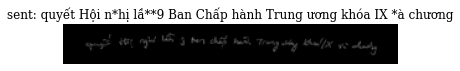

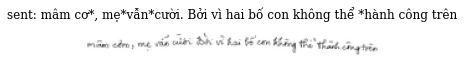

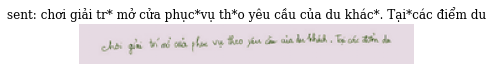

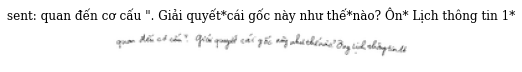

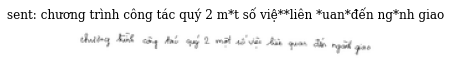

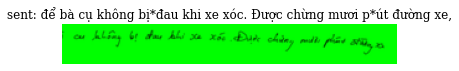

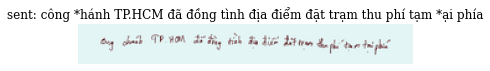

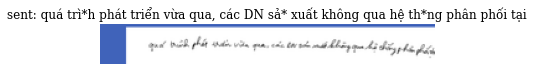

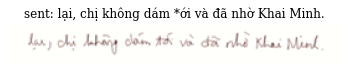

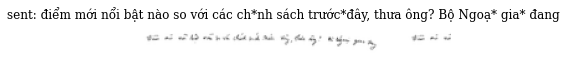

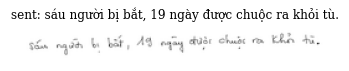

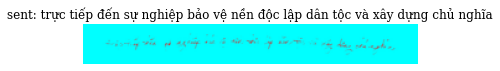

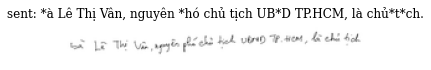

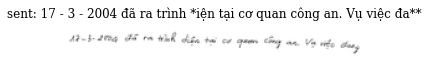

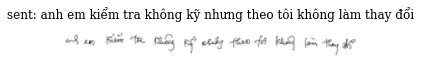

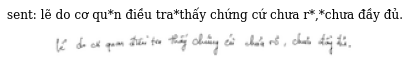

In [32]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()